In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string


In [192]:
#Cargamos los datos de excel.

rellenado_manual = pd.read_excel("TemplateHidrociclonesV1.xlsx", sheet_name="Mediciones")
print(rellenado_manual.head())


#Cargamos el horotmetro de la operación. Por cada bateria.

horometro_1011 = pd.read_excel(
    "Horómetros L3.xlsx", 
    sheet_name="Línea 3", 
    usecols="C,D:M",  # Usar el par de columnas dinámico
    skiprows=2,  # Saltar las primeras 2 filas
    header=None
)

# Asignar manualmente nombres de columnas
horometro_1011.columns = ["FECHA", " CyA", " CyB", " CyC", " CyD", " CyE", " CyF", " CyG", " CyH", " CyI", " CyJ"]
horometro_1011["FECHA"] = pd.to_datetime(horometro_1011["FECHA"])

horometro_1012 = pd.read_excel(
    "Horómetros L3.xlsx", 
    sheet_name="Línea 3", 
    usecols="C,N:W",  # Usar el par de columnas dinámico
    skiprows=2,  # Saltar las primeras 2 filas
    header=None
)

# Asignar manualmente nombres de columnas
horometro_1012.columns = ["FECHA", " CyA", " CyB", " CyC", " CyD", " CyE", " CyF", " CyG", " CyH", " CyI", " CyJ"]
horometro_1012["FECHA"] = pd.to_datetime(horometro_1012["FECHA"])

horometro_1013 = pd.read_excel(
    "Horómetros L3.xlsx", 
    sheet_name="Línea 3", 
    usecols="C,X:AG",  # Usar el par de columnas dinámico
    skiprows=2,  # Saltar las primeras 2 filas
    header=None
)

# Asignar manualmente nombres de columnas
horometro_1013.columns = ["FECHA", " CyA", " CyB", " CyC", " CyD", " CyE", " CyF", " CyG", " CyH", " CyI", " CyJ"]
horometro_1013["FECHA"] = pd.to_datetime(horometro_1013["FECHA"])


horometro_1014 = pd.read_excel(
    "Horómetros L3.xlsx", 
    sheet_name="Línea 3", 
    usecols="C,AH:AQ",  # Usar el par de columnas dinámico
    skiprows=2,  # Saltar las primeras 2 filas
    header=None
)

# Asignar manualmente nombres de columnas
horometro_1014.columns = ["FECHA", " CyA", " CyB", " CyC", " CyD", " CyE", " CyF", " CyG", " CyH", " CyI", " CyJ"]
horometro_1014["FECHA"] = pd.to_datetime(horometro_1014["FECHA"])


data_operacion = operacion = pd.read_excel(
    "Covars L3 Cleaned.xlsx",
    header=0
)

#baterias = ["BHC 01", "BHC 02", "BHC 03"," BHC 03", "BHC 1011", "BHC 1012", "BHC 1013", "BHC 1014"]
#horometros = [horometro_1011, horometro_1012, horometro_1013, horometro_1014]

       FECHA   Bateria Ciclón Medicion
0 2011-03-08  BHC 1011    CyA      232
1 2011-03-08  BHC 1011    CyB      240
2 2011-03-08  BHC 1011    CyC      435
3 2011-03-08  BHC 1011    CyD    232.5
4 2011-03-08  BHC 1011    CyE      250


In [193]:
#Modularización de los datos de medicion de hidrociclones, por cada batría.

def get_med_df(bateria: str, plot = False) -> pd.DataFrame:
    """Obtiene un DataFrame de mediciones de una batería."""
    battery = rellenado_manual[rellenado_manual["Bateria"] == bateria]

    # Consideramos desde 2017:
    battery = battery[battery["FECHA"].dt.year != 2011]

    # No consideramos hidrociclones que sean de transición "T":
    battery = battery[battery["Medicion"] != "T"]
    battery = battery[battery["Medicion"] != "S/C"]
    battery = battery[battery["Medicion"] != "EMBANCADO"]
    #Eliminamos la columna de "Bateria" porque ya no es necesaria:´
    #battery = battery.drop(columns="Bateria")    

    # Los valores de medición menores a 220 los re-escalamos a 230, sumando 30 a cada valor menor a 220:
    battery.loc[battery["Medicion"] < 220, "Medicion"] += 30

    # Los valores de medición mayores a 270 los eliminamos porque son outliers
    battery = battery[battery["Medicion"] <= 270]

    # Convertimos la columna de fecha a datetime:

    battery["FECHA"] = pd.to_datetime(battery["FECHA"])
    battery = battery.sort_values("FECHA")

    return battery

In [194]:
#probamos la función get_med_df
b_01 = get_med_df("BHC 01", plot=True)

#Para cada bateria se aplica la función get_med_df
b_02 = get_med_df("BHC 02")
b_03 = get_med_df("BHC 03")
b_04 = get_med_df("BHC 04")
b_1011 = get_med_df("BHC 1011")
b_1012 = get_med_df("BHC 1012")
b_1013 = get_med_df("BHC 1013")
b_1014 = get_med_df("BHC 1014")

#Se printean los datos de las baterias.
print(b_01.head())
print(b_02.head())
print(b_03.head())
print(b_04.head())
print(b_1011.head())
print(b_1012.head())
print(b_1013.head())
print(b_1014.head())

#Esto terminamos el tratamiento de datos con TemplateHidrociclonesV1.xlsx.

         FECHA Bateria Ciclón Medicion
720 2024-09-06  BHC 01    Cy1      232
721 2024-09-06  BHC 01    Cy2      230
722 2024-09-06  BHC 01    Cy3    230.5
723 2024-09-06  BHC 01    Cy4    230.5
725 2024-09-06  BHC 01    Cy6      232
         FECHA Bateria Ciclón Medicion
519 2023-07-21  BHC 02    Cy1      232
521 2023-07-21  BHC 02    Cy3      231
522 2023-07-21  BHC 02    Cy4      235
523 2023-07-21  BHC 02    Cy5      230
524 2023-07-21  BHC 02    Cy6      230
         FECHA Bateria Ciclón Medicion
666 2024-08-12  BHC 03    Cy1    230.5
667 2024-08-12  BHC 03    Cy2    230.5
668 2024-08-12  BHC 03    Cy3    230.5
669 2024-08-12  BHC 03    Cy4      231
671 2024-08-12  BHC 03    Cy6    231.5
         FECHA Bateria Ciclón Medicion
658 2024-08-09  BHC 04    Cy1    230.5
659 2024-08-09  BHC 04    Cy2      230
660 2024-08-09  BHC 04    Cy3      231
661 2024-08-09  BHC 04    Cy4      230
663 2024-08-09  BHC 04    Cy6    230.5
        FECHA   Bateria Ciclón Medicion
40 2017-04-07  BHC 1011 

In [195]:
import pandas as pd

def preparar_operaciones(operacion: pd.DataFrame) -> pd.DataFrame:
    """
    Prepara el DataFrame general de operaciones a partir de datos individuales de cada batería.
    """

    # Definir subconjuntos de datos para cada batería
    baterias = {
        "1011": ["FECHA", "Caudal 1021", "TPH", "% Solido 1011", "Presion 1011"],
        "1012": ["FECHA", "Caudal 1022", "TPH", "% Solido 1012", "Presion 1012"],
        "1013": ["FECHA", "Caudal 1023", "TPH", "% Solido 1013", "Presion 1013"],
        "1014": ["FECHA", "Caudal 1024", "TPH", "% Solido 1014", "Presion 1014"],
    }

    # Lista para almacenar los DataFrames de cada batería
    df_baterias = []
    
    # Extraer y normalizar columnas de cada batería
    for bateria, columnas in baterias.items():
        if all(col in operacion.columns for col in columnas):
            df_temp = operacion.loc[:, columnas].copy()
            df_temp.columns = ["FECHA", "Caudal", "TPH", "% Solido", "Presion"]
            df_temp["Bateria"] = bateria

            # Convertir columnas a numéricas dentro de df_temp (y no en operaciones)
            df_temp["% Solido"] = pd.to_numeric(df_temp["% Solido"], errors='coerce')
            df_temp["Presion"] = pd.to_numeric(df_temp["Presion"], errors='coerce')
            df_temp["Caudal"] = pd.to_numeric(df_temp["Caudal"], errors='coerce')
            df_temp["TPH"] = pd.to_numeric(df_temp["TPH"], errors='coerce')

            df_baterias.append(df_temp)

    # Concatenar todos los DataFrames en uno solo
    operaciones = pd.concat(df_baterias, ignore_index=True)

    return operaciones

def get_op_df(operaciones: pd.DataFrame, bateria: str) -> pd.DataFrame:
    """
    Obtiene un DataFrame de operación de una batería específica.
    """
    battery = operaciones[operaciones["Bateria"] == bateria]
    return battery.drop(columns=["Bateria"])


In [196]:
# Suponiendo que 'operacion' es el DataFrame original
operaciones = preparar_operaciones(operacion)

# Obtener datos de una batería específica
df_bateria_1011 = get_op_df(operaciones, "1011")
df_bateria_1012 = get_op_df(operaciones, "1012")
df_bateria_1013 = get_op_df(operaciones, "1013")
df_bateria_1014 = get_op_df(operaciones, "1014")
# Mostrar los primeros registros
print(df_bateria_1011.head())
print(df_bateria_1012.head())
print(df_bateria_1013.head())
print(df_bateria_1014.head())


       FECHA   Caudal          TPH   % Solido   Presion
0 2017-01-01  4.21149  4071.989990  78.409096  0.142489
1 2017-01-02  4.21149  4627.060547  78.409096  0.155240
2 2017-01-03  4.21149  4990.644531  78.409096  0.152158
3 2017-01-04  4.21149  5182.717773  78.409096  0.183200
4 2017-01-05  4.21149  5305.606934  78.409096  0.142489
          FECHA  Caudal          TPH   % Solido    Presion
2963 2017-01-01     0.0  4071.989990  78.409096  12.853136
2964 2017-01-02     0.0  4627.060547  78.409096   9.822185
2965 2017-01-03     0.0  4990.644531  78.409096  10.218544
2966 2017-01-04     0.0  5182.717773  78.409096  11.143022
2967 2017-01-05     0.0  5305.606934  78.409096  10.460158
          FECHA       Caudal          TPH   % Solido    Presion
5926 2017-01-01  4799.238770  4071.989990  72.812927   9.236988
5927 2017-01-02  4981.168945  4627.060547  73.287788   9.751577
5928 2017-01-03  5083.607422  4990.644531  72.841545   9.746761
5929 2017-01-04  5333.422363  5182.717773  72.675949  

In [197]:
#Limpiaremos los datos de los df_bateria_1011, df_bateria_1012, df_bateria_1013 y df_bateria_1014.

def no_negatividad(operaciones: pd.DataFrame) -> pd.DataFrame:
    """
    Limpia el DataFrame de operaciones.
    """
    # Eliminar filas con valores nulos
    operaciones = operaciones.dropna()

    # Eliminar filas con valores negativos en las columnas de interés
    operaciones = operaciones[operaciones["Caudal"] >= 0]
    operaciones = operaciones[operaciones["TPH"] >= 0]
    operaciones = operaciones[operaciones["% Solido"] >= 0]
    operaciones = operaciones[operaciones["Presion"] >= 0]


    return operaciones

#Tratamos los outliers de los datos de operaciones/ presión, caudal, TPH y % Solido.


def corregir_presion(operaciones: pd.DataFrame) -> pd.DataFrame:
    """
    Corrige valores de la columna 'Presion' si son menores a 1.
    Se reemplazan por la mediana de los valores mayores a 1 más ruido gaussiano.
    """
    presion_median = operaciones[operaciones["Presion"] > 1]["Presion"].median()
    presion_std = operaciones[operaciones["Presion"] > 1]["Presion"].std()
    num_missing = operaciones.loc[operaciones["Presion"] < 1].shape[0]

    operaciones.loc[operaciones["Presion"] < 1, "Presion"] = (
        presion_median + np.random.normal(0, presion_std * 0.1, size=num_missing)
    )
    return operaciones

def corregir_solido(operaciones: pd.DataFrame) -> pd.DataFrame:
    """
    Corrige valores de la columna '% Solido' si son menores a 10.
    Se reemplazan por 70 más ruido gaussiano.
    """
    solido_std = operaciones.loc[operaciones["% Solido"] >= 10, "% Solido"].std()
    num_missing = operaciones.loc[operaciones["% Solido"] < 10].shape[0]

    operaciones.loc[operaciones["% Solido"] < 10, "% Solido"] = (
        70 + np.random.normal(0, solido_std * 0.1, size=num_missing)
    )
    return operaciones

def corregir_caudal(operaciones: pd.DataFrame) -> pd.DataFrame:
    """
    Corrige valores de la columna 'Caudal' si son menores a 1000.
    Se reemplazan por la mediana de los valores mayores a 1000 más ruido gaussiano.
    """
    caudal_median = operaciones[operaciones["Caudal"] > 1000]["Caudal"].median()
    caudal_std = operaciones[operaciones["Caudal"] > 1000]["Caudal"].std()
    num_missing = operaciones.loc[operaciones["Caudal"] < 1000].shape[0]

    operaciones.loc[operaciones["Caudal"] < 1000, "Caudal"] = (
        caudal_median + np.random.normal(0, caudal_std * 0.1, size=num_missing)
    )
    return operaciones

def corregir_tph(operaciones: pd.DataFrame) -> pd.DataFrame:
    """
    Corrige valores de la columna 'TPH' si son menores a 900.
    Se reemplazan por la mediana de los valores mayores a 1000 más ruido gaussiano.
    """
    tph_median = operaciones[operaciones["TPH"] > 1000]["TPH"].median()
    tph_std = operaciones[operaciones["TPH"] > 1000]["TPH"].std()
    num_missing = operaciones.loc[operaciones["TPH"] < 900].shape[0]

    operaciones.loc[operaciones["TPH"] < 900, "TPH"] = (
        tph_median + np.random.normal(0, tph_std * 0.1, size=num_missing)
    )
    return operaciones

# Aplicar correcciones a los DataFrames de operacione

In [198]:
def corregir_baterias(baterias: dict) -> dict:
    """
    Aplica las funciones de corrección a un conjunto de DataFrames de baterías.
    
    Parámetros:
    - baterias (dict): Diccionario con nombres de baterías como claves y DataFrames como valores.

    Retorna:
    - dict: Diccionario con los DataFrames corregidos.
    """
    baterias_corregidas = {}
    
    for nombre, df in baterias.items():
        df = no_negatividad(df)
        df = corregir_presion(df)
        df = corregir_solido(df)
        df = corregir_caudal(df)
        df = corregir_tph(df)
        baterias_corregidas[nombre] = df  # Guardar el DataFrame corregido
    
    return baterias_corregidas

# -------------------
# USO DE LA FUNCIÓN
# -------------------
baterias = {
    "1011": df_bateria_1011,
    "1012": df_bateria_1012,
    "1013": df_bateria_1013,
    "1014": df_bateria_1014,
}
# Aplicar la corrección a todas las baterías
baterias_corregidas = corregir_baterias(baterias)

for nombre, df in baterias_corregidas.items():
    print(f"\nBatería {nombre}")
    print(df.head())




Batería 1011
       FECHA       Caudal          TPH   % Solido   Presion
0 2017-01-01  3654.451649  4071.989990  78.409096  9.744130
1 2017-01-02  3601.613872  4627.060547  78.409096  9.859545
2 2017-01-03  3760.589130  4990.644531  78.409096  9.868718
3 2017-01-04  3563.898661  5182.717773  78.409096  9.824766
4 2017-01-05  3619.910951  5305.606934  78.409096  9.782012

Batería 1012
          FECHA       Caudal          TPH   % Solido    Presion
2963 2017-01-01  4753.215522  4071.989990  78.409096  12.853136
2964 2017-01-02  4604.616559  4627.060547  78.409096   9.822185
2965 2017-01-03  4703.200355  4990.644531  78.409096  10.218544
2966 2017-01-04  4787.474706  5182.717773  78.409096  11.143022
2967 2017-01-05  4632.870635  5305.606934  78.409096  10.460158

Batería 1013
          FECHA       Caudal          TPH   % Solido    Presion
5926 2017-01-01  4799.238770  4071.989990  72.812927   9.236988
5927 2017-01-02  4981.168945  4627.060547  73.287788   9.751577
5928 2017-01-03  5083.

In [199]:
#Se concatena el diccionario de baterias corregidas junto a los dataframes de mediciones de hidrociclones correspondientes a las baterias. 

#El dataframe de las mediciones contiene fecha/bateria/Ciclon/Medicion.

#EL diccionario de baterias corregidas contiene fecha/caudal/TPH/% Solido/Presion.

#Se unen ambos dataframes por la fecha y la bateria.

def unir_dataframes(baterias: dict, mediciones: dict) -> dict:
    """
    Une DataFrames de mediciones de hidrociclones con DataFrames de operaciones.
    
    Parámetros:
    - baterias (dict): Diccionario con nombres de baterías como claves y DataFrames de operaciones como valores.
    - mediciones (dict): Diccionario con nombres de baterías como claves y DataFrames de mediciones como valores.

    Retorna:
    - dict: Diccionario con los DataFrames unidos.
    """
    baterias_unidas = {}

    for nombre, df in baterias.items():
        df_med = mediciones[nombre]
        df_unido = pd.merge(df, df_med, on="FECHA")
        baterias_unidas[nombre] = df_unido

    return baterias_unidas

In [200]:
#Probar la función concatenar_baterias
baterias_unidas = unir_dataframes(baterias_corregidas, {
    "1011": b_1011,
    "1012": b_1012,
    "1013": b_1013,
    "1014": b_1014,
})

for nombre, df in baterias_unidas.items():
    print(f"\nBatería {nombre}")
    print(df.head())


Batería 1011
       FECHA       Caudal          TPH   % Solido   Presion   Bateria Ciclón  \
0 2017-04-07  3676.865263  4666.039667  70.197335  9.752136  BHC 1011    CyA   
1 2017-04-07  3676.865263  4666.039667  70.197335  9.752136  BHC 1011    CyB   
2 2017-04-07  3676.865263  4666.039667  70.197335  9.752136  BHC 1011    CyD   
3 2017-04-07  3676.865263  4666.039667  70.197335  9.752136  BHC 1011    CyE   
4 2017-04-07  3676.865263  4666.039667  70.197335  9.752136  BHC 1011    CyF   

  Medicion  
0    236.5  
1      242  
2    237.5  
3      247  
4    243.5  

Batería 1012
       FECHA       Caudal          TPH   % Solido   Presion   Bateria Ciclón  \
0 2017-04-07  4635.756601  4705.647364  70.288367  9.831935  BHC 1012    CyA   
1 2017-04-07  4635.756601  4705.647364  70.288367  9.831935  BHC 1012    CyB   
2 2017-04-07  4635.756601  4705.647364  70.288367  9.831935  BHC 1012    CyD   
3 2017-04-07  4635.756601  4705.647364  70.288367  9.831935  BHC 1012    CyE   
4 2017-04-07 

In [201]:
baterias_unidas["1011"]

,FECHA,Caudal,TPH,% Solido,Presion,Bateria,Ciclón,Medicion
0,2017-04-07,3676.865263,4666.039667,70.197335,9.752136,BHC 1011,CyA,236.5
1,2017-04-07,3676.865263,4666.039667,70.197335,9.752136,BHC 1011,CyB,242
2,2017-04-07,3676.865263,4666.039667,70.197335,9.752136,BHC 1011,CyD,237.5
3,2017-04-07,3676.865263,4666.039667,70.197335,9.752136,BHC 1011,CyE,247
4,2017-04-07,3676.865263,4666.039667,70.197335,9.752136,BHC 1011,CyF,243.5
...,...,...,...,...,...,...,...,...
132,2024-10-20,6353.997070,5004.881348,67.667305,9.912685,BHC 1011,CyC,234.5
133,2024-10-20,6353.997070,5004.881348,67.667305,9.912685,BHC 1011,CyB,231
134,2024-10-20,6353.997070,5004.881348,67.667305,9.912685,BHC 1011,CyA,234
135,2024-10-20,6353.997070,5004.881348,67.667305,9.912685,BHC 1011,CyD,239.5


In [202]:
def corregir_baterias(baterias: dict) -> dict:
    """
    Aplica las funciones de corrección a un conjunto de DataFrames de baterías.
    
    Parámetros:
    - baterias (dict): Diccionario con nombres de baterías como claves y DataFrames como valores.

    Retorna:
    - dict: Diccionario con los DataFrames corregidos.
    """
    baterias_corregidas = {}
    
    for nombre, df in baterias.items():
        # Le hacemos un strip a todas las categorías en batería para todas las baterías:
        df["Ciclón"] = df["Ciclón"].str.strip()

        # A cada categoría en las baterías le añadimos un espacio al inicio:
        df["Ciclón"] = " " + df["Ciclón"]

        baterias_corregidas[nombre] = df  # Guardar el DataFrame corregido

    return baterias_corregidas

In [203]:
baterias_unidas = corregir_baterias(baterias_unidas)

In [204]:
#Guardamos los datos limpios en un archivo excel, con un sheet por cada bateria.

with pd.ExcelWriter("datos_limpios.xlsx") as writer:
    for nombre, df in baterias_unidas.items():
        df.to_excel(writer, sheet_name=nombre, index=False)

#Se termina el tratamiento de datos con los archivos TemplateHidrociclonesV1.xlsx y Covars L3 Cleaned.xlsx.

In [205]:
#Tratado de Horometros L3.xlsx

#Se limpian los datos de los horometros.

#Convertimos los datos de los horometros a datatimes.

def convertir_a_datetime(horometro: pd.DataFrame) -> pd.DataFrame:
    """
    Convierte las columnas de fecha a datetime.
    """
    horometro["FECHA"] = pd.to_datetime(horometro["FECHA"])
    return horometro

In [206]:
#probamos la función convertir_a_datetime
horometro_1011 = convertir_a_datetime(horometro_1011)
print(horometro_1011.head())

       FECHA          CyA           CyB          CyC          CyD  \
0 2017-01-01  6111.300293   9997.246094  8743.168945  8067.634277   
1 2017-01-02  6135.299316   9999.869141  8767.167969  8067.634277   
2 2017-01-03  6144.395508  10008.965820  8776.254883  8067.637207   
3 2017-01-04  6157.703125  10028.348633  8793.269531  8082.384277   
4 2017-01-05  6162.517578  10028.788086  8793.701172  8082.447754   

           CyE          CyF          CyG          CyH         CyI          CyJ  
0  5882.358398  8407.399414  9070.787109  9701.552734  998.748047  6948.669434  
1  5882.358398  8407.399414  9070.787109  9725.551758  998.748047  6972.667969  
2  5882.358398  8407.408203  9070.795898  9734.650391  998.748047  6981.932617  
3  5882.730469  8409.956055  9076.391602  9743.518555  998.748047  7005.658203  
4  5882.730957  8410.092773  9076.529297  9743.717773  998.748047  7011.115723  


In [207]:
#Convertimos los datos de los horometros a valors numéricos.

def convertir_a_numericos(horometro: pd.DataFrame) -> pd.DataFrame:
    """
    Convierte las columnas de horómetros a numéricas.
    """
    for col in horometro.columns[1:]:
        horometro[col] = pd.to_numeric(horometro[col], errors='coerce')
    return horometro

In [208]:
#probamos la función convertir_a_numericos
horometro_1011 = convertir_a_numericos(horometro_1011)
horometro_1012 = convertir_a_numericos(horometro_1012)
horometro_1013 = convertir_a_numericos(horometro_1013)
horometro_1014 = convertir_a_numericos(horometro_1014)
print(horometro_1011.head())
print(horometro_1012.head())
print(horometro_1013.head())
print(horometro_1014.head())


       FECHA          CyA           CyB          CyC          CyD  \
0 2017-01-01  6111.300293   9997.246094  8743.168945  8067.634277   
1 2017-01-02  6135.299316   9999.869141  8767.167969  8067.634277   
2 2017-01-03  6144.395508  10008.965820  8776.254883  8067.637207   
3 2017-01-04  6157.703125  10028.348633  8793.269531  8082.384277   
4 2017-01-05  6162.517578  10028.788086  8793.701172  8082.447754   

           CyE          CyF          CyG          CyH         CyI          CyJ  
0  5882.358398  8407.399414  9070.787109  9701.552734  998.748047  6948.669434  
1  5882.358398  8407.399414  9070.787109  9725.551758  998.748047  6972.667969  
2  5882.358398  8407.408203  9070.795898  9734.650391  998.748047  6981.932617  
3  5882.730469  8409.956055  9076.391602  9743.518555  998.748047  7005.658203  
4  5882.730957  8410.092773  9076.529297  9743.717773  998.748047  7011.115723  
       FECHA          CyA          CyB          CyC           CyD  \
0 2017-01-01  7691.448730  689

In [209]:

def no_negatividad(horometro: pd.DataFrame) -> pd.DataFrame:
    """
    Limpia el DataFrame de horómetros.
    """
    # Eliminar filas con valores nulos
    horometro = horometro.dropna()

    # Eliminar filas con valores negativos en las columnas de interés
    horometro = horometro[horometro[" CyA"] >= 0]
    horometro = horometro[horometro[" CyB"] >= 0]
    horometro = horometro[horometro[" CyC"] >= 0]
    horometro = horometro[horometro[" CyD"] >= 0]
    horometro = horometro[horometro[" CyE"] >= 0]
    horometro = horometro[horometro[" CyF"] >= 0]
    horometro = horometro[horometro[" CyG"] >= 0]
    horometro = horometro[horometro[" CyH"] >= 0]
    horometro = horometro[horometro[" CyI"] >= 0]
    horometro = horometro[horometro[" CyJ"] >= 0]

    return horometro

In [210]:
#probamos la función no_negatividad
horometro_1011 = no_negatividad(horometro_1011)
print(horometro_1011.head())

       FECHA          CyA           CyB          CyC          CyD  \
0 2017-01-01  6111.300293   9997.246094  8743.168945  8067.634277   
1 2017-01-02  6135.299316   9999.869141  8767.167969  8067.634277   
2 2017-01-03  6144.395508  10008.965820  8776.254883  8067.637207   
3 2017-01-04  6157.703125  10028.348633  8793.269531  8082.384277   
4 2017-01-05  6162.517578  10028.788086  8793.701172  8082.447754   

           CyE          CyF          CyG          CyH         CyI          CyJ  
0  5882.358398  8407.399414  9070.787109  9701.552734  998.748047  6948.669434  
1  5882.358398  8407.399414  9070.787109  9725.551758  998.748047  6972.667969  
2  5882.358398  8407.408203  9070.795898  9734.650391  998.748047  6981.932617  
3  5882.730469  8409.956055  9076.391602  9743.518555  998.748047  7005.658203  
4  5882.730957  8410.092773  9076.529297  9743.717773  998.748047  7011.115723  


In [211]:

def identificar_fecha_menor_a_100(horometro: pd.DataFrame) -> pd.DataFrame:
    """
    Identifica la primera fecha en que el valor de cada columna sea menor a 100.
    """
    fechas = {}
    for col in horometro.columns[1:]:
        fecha = horometro.loc[horometro[col] < 100, "FECHA"].min()
        fechas[col] = fecha
    return fechas

In [212]:
#probamos la función identificar_fecha_menor_a_100
print(identificar_fecha_menor_a_100(horometro_1011))
print(identificar_fecha_menor_a_100(horometro_1012))
print(identificar_fecha_menor_a_100(horometro_1013))
print(identificar_fecha_menor_a_100(horometro_1014))

{' CyA': Timestamp('2020-08-29 00:00:00'), ' CyB': Timestamp('2020-08-29 00:00:00'), ' CyC': Timestamp('2020-08-29 00:00:00'), ' CyD': Timestamp('2020-08-29 00:00:00'), ' CyE': Timestamp('2020-08-29 00:00:00'), ' CyF': Timestamp('2020-08-29 00:00:00'), ' CyG': Timestamp('2020-08-29 00:00:00'), ' CyH': Timestamp('2020-08-29 00:00:00'), ' CyI': Timestamp('2020-08-29 00:00:00'), ' CyJ': Timestamp('2020-08-29 00:00:00')}
{' CyA': Timestamp('2020-08-29 00:00:00'), ' CyB': Timestamp('2020-08-29 00:00:00'), ' CyC': Timestamp('2020-08-29 00:00:00'), ' CyD': Timestamp('2020-08-29 00:00:00'), ' CyE': Timestamp('2020-08-29 00:00:00'), ' CyF': Timestamp('2020-08-29 00:00:00'), ' CyG': Timestamp('2020-08-29 00:00:00'), ' CyH': Timestamp('2020-08-29 00:00:00'), ' CyI': Timestamp('2020-08-29 00:00:00'), ' CyJ': Timestamp('2020-08-29 00:00:00')}
{' CyA': Timestamp('2019-04-06 00:00:00'), ' CyB': Timestamp('2019-04-06 00:00:00'), ' CyC': Timestamp('2019-04-06 00:00:00'), ' CyD': Timestamp('2019-04-06 0

In [213]:
#Con los datos de identificar_fecha_menor_a_100, se identifican las fechas en las que los valores de los horometros son menores a 100. Luego se suman los valores de la fecha anterior a la fecha menor a 100.
#Esto se hace para los horometros 1011, 1012, 1013 y 1014, por medio de una nueva función.

def corregir_horometros(horometros: dict) -> dict:
    """
    Corrige valores de los
    """
    for nombre, df in horometros.items():
        fecha_menor_a_100 = identificar_fecha_menor_a_100(df)
        for col, fecha in fecha_menor_a_100.items():
            if fecha is not pd.NaT:
                df.loc[df["FECHA"] >= fecha, col] += df.loc[df["FECHA"] == fecha - pd.DateOffset(1), col].values[0]
    return horometros

In [214]:
#probamos la función corregir_horometros
horometros = {
    "1011": horometro_1011,
    "1012": horometro_1012,
    "1013": horometro_1013,
    "1014": horometro_1014,
}
horometros_corregidos = corregir_horometros(horometros)

print(horometros_corregidos["1011"].head())

       FECHA          CyA           CyB          CyC          CyD  \
0 2017-01-01  6111.300293   9997.246094  8743.168945  8067.634277   
1 2017-01-02  6135.299316   9999.869141  8767.167969  8067.634277   
2 2017-01-03  6144.395508  10008.965820  8776.254883  8067.637207   
3 2017-01-04  6157.703125  10028.348633  8793.269531  8082.384277   
4 2017-01-05  6162.517578  10028.788086  8793.701172  8082.447754   

           CyE          CyF          CyG          CyH         CyI          CyJ  
0  5882.358398  8407.399414  9070.787109  9701.552734  998.748047  6948.669434  
1  5882.358398  8407.399414  9070.787109  9725.551758  998.748047  6972.667969  
2  5882.358398  8407.408203  9070.795898  9734.650391  998.748047  6981.932617  
3  5882.730469  8409.956055  9076.391602  9743.518555  998.748047  7005.658203  
4  5882.730957  8410.092773  9076.529297  9743.717773  998.748047  7011.115723  


In [215]:
#Generamos un archivo excel con los datos limpios de los horometros.

with pd.ExcelWriter("horometros_limpios.xlsx") as writer:
    for nombre, df in horometros_corregidos.items():
        df.to_excel(writer, sheet_name=nombre, index=False)

#Se termina el tratamiento de datos con el archivo Horómetros L3.xlsx.

In [216]:
#Tratado de datos de los archivos limpios.

#Cargamos los datos limpios de los archivos excel.

datos_limpios = pd.read_excel("datos_limpios.xlsx", sheet_name=None)

#Se cargan los datos limpios de los horometros.

horometros_limpios = pd.read_excel("horometros_limpios.xlsx", sheet_name=None)

In [217]:
def merge_df(datos: dict, horometros: dict) -> dict:
    """
    Une los DataFrames de datos y horómetros.

    ** Asume que ambos diccionarios tienen las mismas claves
    """

    datos_unidos = {}
    for nombre, df in datos.items():
        # Realizar el merge basado en la fecha
        df_merged = df.merge(horometros[nombre], on="FECHA", how="left")

        # Asignar los valores correctos según el ciclón
        df_merged["horometro"] = df_merged.apply(lambda row: row[row["Ciclón"]], axis=1)

        # Borramos todas las columnas que lleven la palabra "Cy" en su nombre:
        df_merged = df_merged.drop(columns=[col for col in df_merged.columns if "Cy" in col])

        # Guardar el DataFrame unido
        datos_unidos[nombre] = df_merged

    return datos_unidos

In [218]:
data = merge_df(datos_limpios, horometros_limpios)

In [219]:
def obtener_caminos(datos: dict) -> dict:
    data = {}
    for nombre, df in datos.items():
        particiones = []  # Lista para almacenar las particiones encontradas
        # Obtenemos un dataframe por ciclón:
        ciclones = df["Ciclón"].unique()
        for ciclon in ciclones:
            # Filtrar y reiniciar el índice para que sea consecutivo
            subdata = df[df["Ciclón"] == ciclon].reset_index(drop=True)
            camino_actual = []  # Reiniciamos el camino para cada ciclón

            # Iterar sobre las filas del DataFrame
            for i in range(len(subdata)):
                # Si no hay un camino actual, buscar el inicio con medición = 230
                if not camino_actual:
                    if subdata.loc[i, "Medicion"] == 230:
                        camino_actual.append(i)
                else:
                    # Añadir la fila actual al camino
                    camino_actual.append(i)
                    # Verificar si la medición actual no es NaN
                    if pd.notnull(subdata.loc[i, "Medicion"]):
                        siguiente_valor = subdata["Medicion"][i+1:].dropna().head(1)
                        if not siguiente_valor.empty and siguiente_valor.values[0] < subdata.loc[i, "Medicion"]:
                            # Si el siguiente valor es menor, cerrar el camino
                            particiones.append(subdata.loc[camino_actual])
                            camino_actual = []  # Reiniciar el camino
        data[nombre] = particiones
    return data

In [220]:
#Probamos la función obtener_caminos
caminos = obtener_caminos(data)

for nombre, particiones in caminos.items():
    print(f"\nBatería {nombre}")
    for i, particion in enumerate(particiones, 1):
        print(f"\nPartición {i}")
        print(particion)


Batería 1011

Partición 1
       FECHA       Caudal          TPH   % Solido   Presion   Bateria Ciclón  \
1 2017-09-12  3654.595801  4905.392578  71.073793  9.871354  BHC 1011    CyA   
2 2017-11-07  3742.810211  4626.294939  70.104912  9.792817  BHC 1011    CyA   
3 2018-05-30  3743.464844  2779.101807  78.402000  9.379667  BHC 1011    CyA   

   Medicion     horometro  
1     230.0   9788.996094  
2     235.0  10797.698242  
3     270.0  14419.621094  

Partición 2
       FECHA       Caudal          TPH   % Solido   Presion   Bateria Ciclón  \
4 2018-09-03  3880.699793  3725.418213  69.410482  9.763830  BHC 1011    CyA   
5 2018-10-02  3683.716006  4464.219983  70.742190  9.899705  BHC 1011    CyA   
6 2019-01-07  3383.291260  4584.543945  71.557327  9.764462  BHC 1011    CyA   
7 2019-03-18  3489.478732  4640.519531  70.676657  9.810309  BHC 1011    CyA   

   Medicion     horometro  
4     230.0  15622.286133  
5     235.0  15630.609375  
6     240.0  16989.433594  
7     240.0  1

In [221]:
# Finalmente obtenemos la base de datos para el analisis de supervivencia:
def stats_by_camino(datos: dict) -> dict:

    caminos = obtener_caminos(datos)
    data_out = {}

    for bateria, df in caminos.items():
        caminos_out = []
        for camino in df:
            # Añadimos un identificador único para cada camino:
            camino["camino_id"] = bateria + camino["Ciclón"].unique()[0] + "_" + str(camino["FECHA"].dt.date.iloc[0])

            # Asegúrate de ordenar el DataFrame por la columna de fechas
            camino = camino.sort_values(by="FECHA")

            # Creamos una variable "uso_230" que es el valor del horometro menos el valor del horometro cuando medicion = 230:
            camino["uso_230"] = np.log(camino["horometro"] - camino.loc[camino["Medicion"] == 230, "horometro"].values[0] + 1)

            # Reemplazamos el caudal por el promedio de los valores de caudal en el camino:
            camino["Caudal"] = camino["Caudal"].mean()

            # Reemplazamos la presión por el promedio de los valores de presión en el camino:
            camino["Presion"] = camino["Presion"].mean()

            camino["TPH_acum"] = camino["TPH"].cumsum()

            # Reemplazamos el TPH por el promedio de los valores de TPH en el camino:
            camino["TPH"] = camino["TPH"].mean()

            # Reemplazamos el % de sólido por el promedio de los valores de % de sólido en el camino:
            camino["% Solido"] = camino["% Solido"].mean()

            # Añadimos los días transcurridos desde el último 230 en el camino:
            camino["dias_230"] = (camino["FECHA"] - camino.loc[camino["Medicion"] == 230, "FECHA"].values[0]).dt.days

            camino["solido_uso"] = camino["% Solido"]*100 / (camino["uso_230"] + 1)
            
            camino["carga_solidos_efectiva"] = np.log1p(camino["solido_uso"] / (camino["Caudal"] + 1)) * camino["TPH_acum"]

            # Ejemplo de creación de variables de interacción/ratio
            camino["ratio_tph_caudal"] = camino["TPH"] / (camino["Caudal"] + 1e-5)
            camino["solido_presion"] = camino["% Solido"] * camino["Presion"]
            
            caminos_out.append(camino)

        data_out[bateria] = caminos_out
    return data_out

In [222]:
def obtener_ultima_obs_camino(datos: dict) -> dict:
    data_out = {}
    caminos = stats_by_camino(datos)
    for bateria, df in caminos.items():
        caminos_out = []
        for camino in df:
            # Obtenemos la última observación del camino
            ultima_obs = camino.iloc[-1]
            caminos_out.append(ultima_obs)
        data_out[bateria] = pd.concat(caminos_out, axis=1).T.reset_index(drop=True)
    return data_out

In [223]:
def compile_df(datos: dict) -> pd.DataFrame:
    data_out = obtener_ultima_obs_camino(datos)
    
    datos_out = {}
    # Creamos una variable Score:
    for bateria, df in data_out.items():
        df['score'] = (df['uso_230']) / (df['Medicion'])


        Q1 = df['score'].quantile(0.25)
        Q3 = df['score'].quantile(0.75)
        IQR = Q3 - Q1       

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR        

        # Filtramos outliers
        df['score_out'] = ((df['score'] < lower_bound) | (df['score'] > upper_bound)).astype(int)
        datos_out[bateria] = df
    return datos_out

In [224]:
data = compile_df(data)

c:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

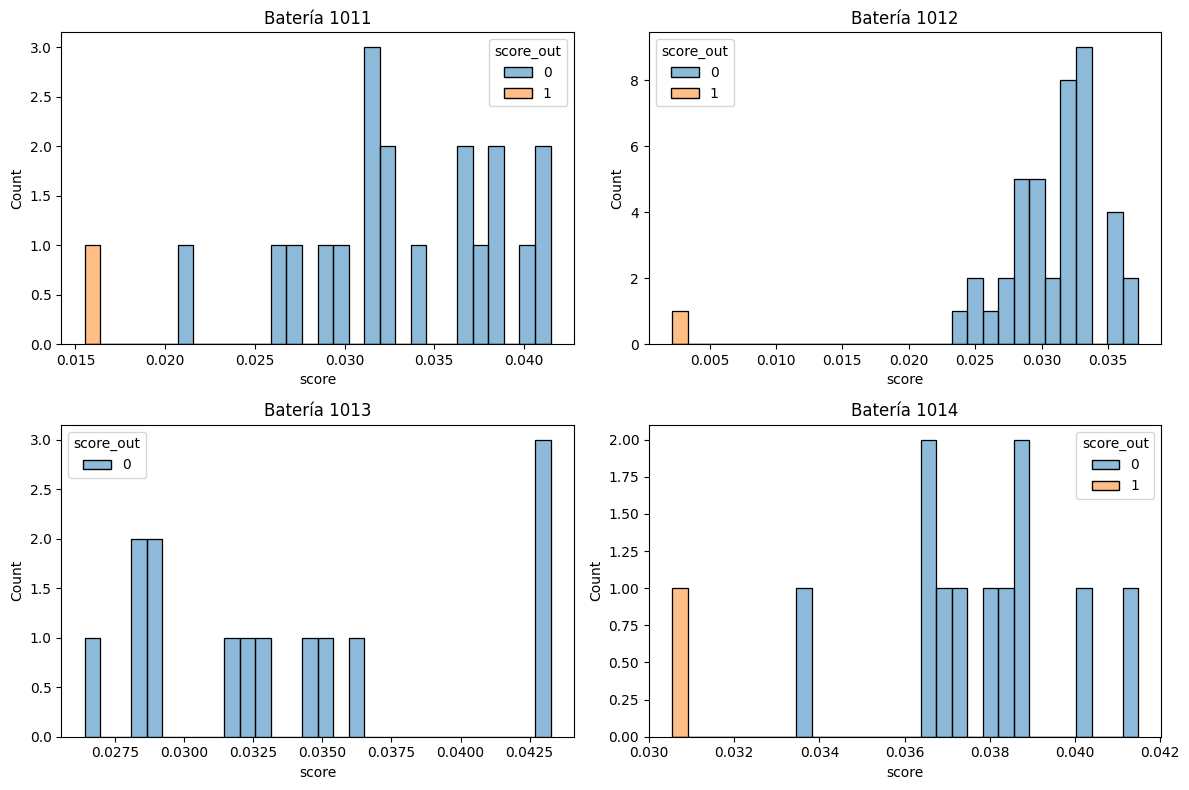

In [225]:
# Hagamos un histograma del score separando por score_out:
# Hacemos los 4 plots en subplots:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas
axes = axes.flatten()  # Aplanamos la matriz de ejes para iterar más fácilmente

for i, (bateria, df) in enumerate(data.items()):
    sns.histplot(df, x="score", hue="score_out", bins=30, ax=axes[i])
    axes[i].set_title(f"Batería {bateria}")

plt.tight_layout()  # Ajusta el diseño para evitar solapamientos
plt.show()


In [226]:
# Finalmente tomamos decisiones del filtrado de datos:
MAX_MEDICION_ADMITIDA = 240
ELIMINAR_OUTLIERS = 1  # 1 para eliminar, 0 para no eliminar
MAX_DIAS_230 = 250
MAX_USO_230 = np.log(4000)

def filtrar_datos(datos: dict) -> dict:
    data_out = {}
    for bateria, df in datos.items():
        if ELIMINAR_OUTLIERS:
            df = df[df["score_out"] == 0]
        df = df[df["Medicion"] <= MAX_MEDICION_ADMITIDA]
        df = df[df["uso_230"] <= MAX_USO_230]
        data_out[bateria] = df

        # Añadimos una variable indicadora que vale 1 si la medición es 240 y 0 si es menor a 240:
        df["E"] = (df["Medicion"] == 240).astype(int)
    return data_out

In [227]:
data = filtrar_datos(data)

In [228]:
with pd.ExcelWriter("database.xlsx") as writer:
    for nombre, df in data.items():
        df.to_excel(writer, sheet_name=nombre, index=False)